In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#使用request包下载数据
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)

In [6]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [7]:
download(file_path, "laptops.csv")
file_name="laptops.csv"

In [8]:
df = pd.read_csv(file_name, header=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [10]:
#np.round 函数保留小数位
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [11]:
#df.isnull() 寻找缺失值
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

In [12]:
#replace the missing values of weight with the average value of the attribute.
# way1 
df['Weight_kg'].fillna(df['Weight_kg'].mean(), inplace=True)

# way2
avg_weight = df['Weight_kg'].astype(float).mean(axis=0)
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

C:\Users\alan\AppData\Local\Temp\ipykernel_18620\2606822829.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(df['Weight_kg'].mean(), inplace=True)
C:\Users\alan\AppData\Local\Temp\ipykernel_18620\2606822829.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [13]:
# replacing missing data with mode
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)
df.head()

C:\Users\alan\AppData\Local\Temp\ipykernel_18620\2377924891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [14]:
#打标签 binning
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

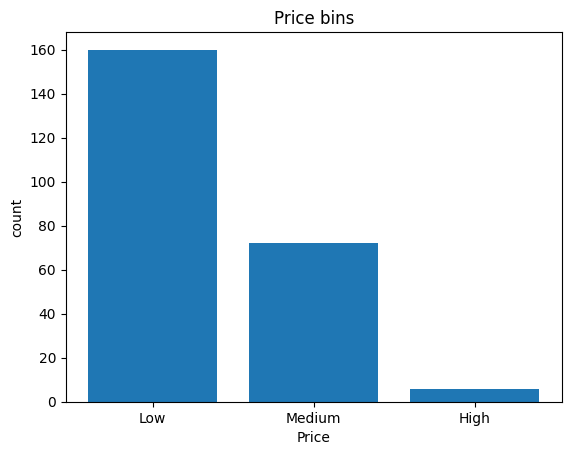

In [15]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [16]:
#数据分类 pd.get_dummies
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
#删除原数据
df.drop("Screen", axis = 1, inplace=True)

In [17]:
df

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,35.56,1.6,8,256,1.60,978,Low,False,True
1,1,Dell,3,1,1,3,39.62,2.0,4,256,2.20,634,Low,True,False
2,2,Dell,3,1,1,7,39.62,2.7,8,256,2.20,946,Low,True,False
3,3,Dell,4,2,1,5,33.78,1.6,8,128,1.22,1244,Low,False,True
4,4,HP,4,2,1,7,39.62,1.8,8,256,1.91,837,Low,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,2,1,7,35.56,2.6,8,256,1.70,1891,Medium,False,True
234,234,Toshiba,3,2,1,5,33.78,2.4,8,256,1.20,1950,Medium,True,False
235,235,Lenovo,4,2,1,5,30.48,2.6,8,256,1.36,2236,Medium,False,True
236,236,Lenovo,3,3,1,5,39.62,2.5,6,256,2.40,883,Low,True,False


In [18]:
dummy_variable_1 = pd.get_dummies(df["Manufacturer"])
dummy_variable_1.head()

,Acer,Asus,Dell,HP,Huawei,Lenovo,MSI,Razer,Samsung,Toshiba,Xiaomi
0,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False


In [19]:
CPU_frequency_counts = df['CPU_frequency'].value_counts().rename('count')

<Axes: xlabel='CPU_frequency'>

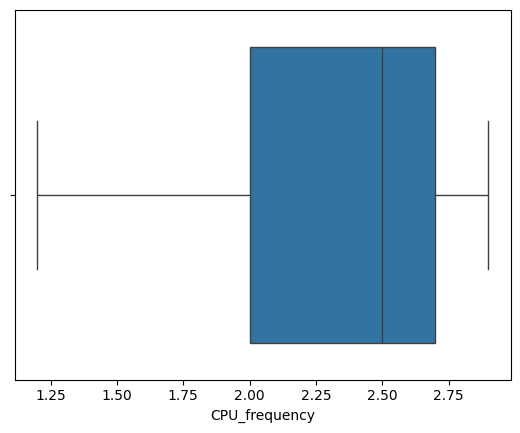

In [20]:
#boxplot
import seaborn as sns
sns.boxplot(x='CPU_frequency', data=df)


Text(0, 0.5, 'RAM_GB')

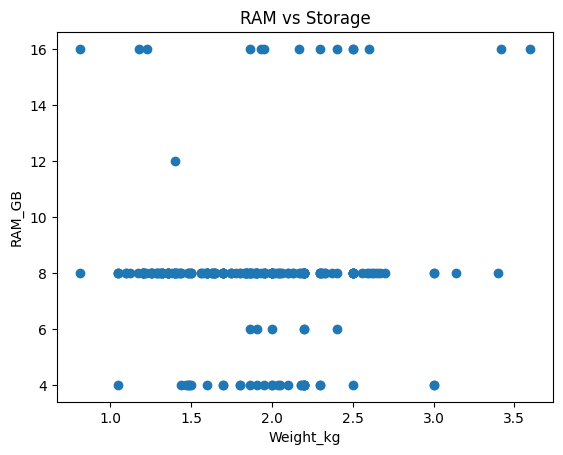

In [21]:
#scatter plot
y = df['RAM_GB']
x = df['Weight_kg']
plt.scatter(x,y)

plt.title('RAM vs Storage')
plt.xlabel('Weight_kg')
plt.ylabel('RAM_GB')


<Axes: xlabel='CPU_frequency', ylabel='CPU_core'>

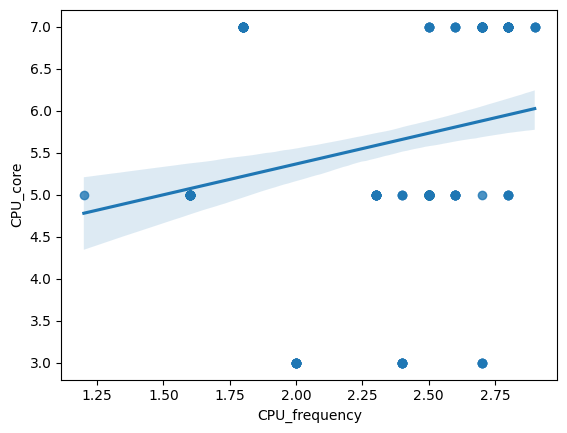

In [23]:
import seaborn as sns
sns.regplot(x = 'CPU_frequency', y = 'CPU_core',data = df)